**Install Antigranular Package**

In [2]:
!pip install antigranular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 132.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 109.7 MB/s eta 0:00:00


### Using Antigranular for Secure Computations

In [3]:
# copy login code snippet from the "UN Datathon PETs Track" section and paste it.
# https://www.antigranular.com/datasets
import antigranular as ag
session = ag.login("uGb9/7aO47ROFevycrNYvrmRuqRhDCfe", "1zpBT+kf5mUCseV2ofyPzB1tUB0Pe0Qvxclx+jFNgb89jrHv9kc/IlckhAwm5soS", competition = "UN Datathon PETs Track")

Connected to Antigranular server session id: 16950eaa-17d1-4d31-bef7-fa18bf5c8071, the session will time out if idle for 60 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


###Checking Epsilon Budget

###Loading the Data

In [33]:
%%ag
df = load_dataset("undata_income")

**Question asked: 'What is the gender of the household member(s) generating income...?'**

In [31]:
%%ag
#df["income_main"]
income_main = [1, 2, 3]

In [57]:
%%ag

def is_Male (x: int) -> int:
  if x == 1:
    return 1
  return 0

def is_Female (x: int) -> int:
  if x == 2:
    return 1
  return 0

def is_Joint (x: int) -> int:
  if x == 3:
    return 1
  return 0

def is_Others (x: int) -> int:
  if not ('x == 1' and 'x == 2' and 'x == 3'):
    return 1
  return 0

In [58]:
%%ag
# "Male",  "Female",  "Joint"
df["Male"] = df["income_main"].map(is_Male, output_bounds = (0 , 1))
df["Female"] = df["income_main"].map(is_Female, output_bounds = (0 , 1))
df["Joint"] = df["income_main"].map(is_Joint, output_bounds = (0 , 1))
df["Others"] = df["income_main"].map(is_Others, output_bounds = (0 , 1))

###Data Visualization

In [59]:
%%ag
from ag_utils import export
ret = [
    df["Male"].mean(eps=0.01),
    df["Female"].mean(eps=0.01),
    df["Joint"].mean(eps=0.01),
    df["Others"].mean(eps=0.01),
         ]
export(
    ret,
    "data_plot"
)

Setting up exported variable in local environment: data_plot


In [60]:
data_plot

[0.1793170104101114, 0.030906718857999973, 0.028050335460994023, 0.0]

In [74]:
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0, "['Male', 'Female', 'Joint', 'Others']")

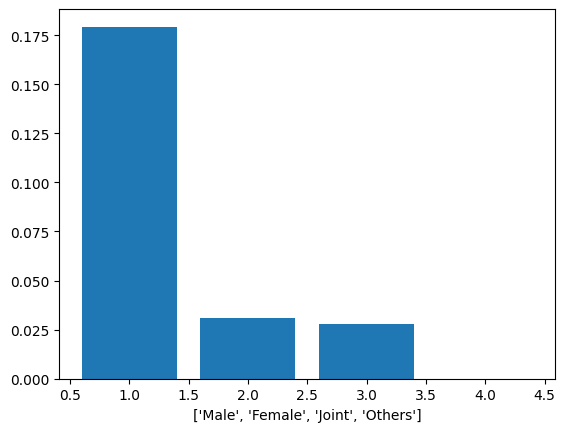

In [77]:
plt.bar([1, 2, 3, 4], data_plot)
plt.xlabel(["Male", "Female", "Joint", "Others"])

**Pie Chart**

In [5]:
session.privacy_odometer()

{'total_epsilon_used': 19.999100000000034,
 'total_delta_used': 0.0,
 'library_costs': {'op_pandas': {'total_delta': 0,
   'total_epsilon': 19.999100000000034,
   'total_requests': 89}},
 'dataset_costs': {'undata_ls': {'delta': 0, 'eps': 2.999999999999995},
  'undata_ls_dif': {'delta': 0, 'eps': 2.999999999999995},
  'undata_crp': {'delta': 0, 'eps': 11.499099999999993},
  'undata_income': {'delta': 0, 'eps': 2.500000000000001}}}

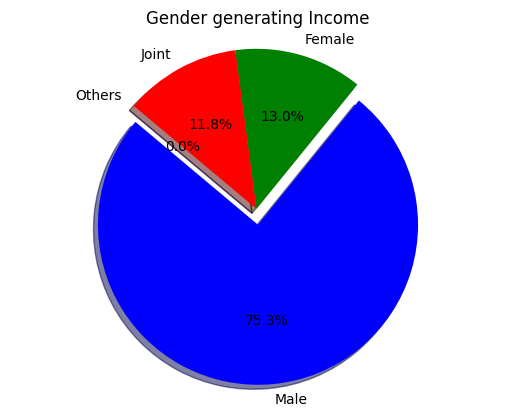

In [2]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Male', 'Female', 'Joint', 'Others']
sizes = [0.1793170104101114, 0.030906718857999973, 0.028050335460994023, 0.0]  # These values should add up to 100 for a proper pie chart
colors = ['blue', 'green', 'red']
explode = (0.1, 0, 0, 0)  # Adjust the explosion of the first slice

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, shadow=True, startangle=140)

# Title of the pie chart
plt.title('Gender generating Income')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


###Viewing Columns, Metadata, and Data Types

In [14]:
%%ag

ag_print("undata_income Details: \n")
ag_print("Columns: \n", undata_income.columns)
ag_print("Metadata: \n", undata_income.metadata)
ag_print("Dtypes: \n", undata_income.dtypes)

undata_income Details: 

Columns: 
 Index(['objectid', 'income_main', 'income_main_amount', 'income_main_gender',
       'income_main_control', 'income_main_comp', 'income_sec',
       'income_sec_amount', 'income_sec_gender', 'income_sec_control',
       'income_sec_comp', 'income_third', 'income_third_amount',
       'income_third_gender', 'income_third_control', 'income_third_comp'],
      dtype='object')
Metadata: 
 {'objectid': (3496, 239871), 'income_main': (1.0, 999.0), 'income_main_amount': (0.0, 1480000000.0), 'income_main_gender': (0.0, 999.0), 'income_main_control': (0.0, 999.0), 'income_main_comp': (1.0, 999.0), 'income_sec': (1.0, 999.0), 'income_sec_amount': (0.0, 15000000.0), 'income_sec_gender': (0.0, 999.0), 'income_sec_control': (0.0, 999.0), 'income_sec_comp': (1.0, 999.0), 'income_third': (1.0, 999.0), 'income_third_amount': (0.0, 10000000.0), 'income_third_gender': (0.0, 999.0), 'income_third_control': (0.0, 999.0), 'income_third_comp': (1.0, 999.0)}
Dtypes: 
 obje

###Conducting Some Basic Descriptive Statistics

In [12]:
%%ag

undata_income_describe = undata_income.describe(eps=0.0001)
ag_print("undata_income Describe:\n", undata_income_describe)

undata_income Describe:
            objectid   income_main  ...  income_third_control  income_third_comp
count  2.008634e+06  2.008634e+06  ...          2.008634e+06       2.008634e+06
mean   3.496000e+03  1.000000e+00  ...          0.000000e+00       1.000000e+00
std    9.111164e+04  3.502424e+02  ...          4.858827e+02       4.672423e+02
min    2.135885e+05  9.707999e+02  ...          6.952567e+02       3.334568e+02
25%    1.109806e+05  6.360951e+02  ...          7.377155e+02       8.039225e+02
50%    6.020434e+04  2.185438e+01  ...          5.184699e+02       2.007312e+02
75%    1.774041e+04  7.684181e+02  ...          3.255990e+02       8.674634e+02
max    1.179397e+04  2.236145e+01  ...          7.297822e+02       7.448825e+02

[8 rows x 16 columns]



##Exporting the non-private result to the local Jupyter server using the `export` method

In [15]:
%%ag

export(undata_income_describe, name='undata_income_describe')

Setting up exported variable in local environment: undata_income_describe


##Accessing exported in local jupyter environment

In [16]:
print(undata_income_describe)

           objectid   income_main  income_main_amount  income_main_gender  \
count  2.008634e+06  2.008634e+06        2.008634e+06        2.008634e+06   
mean   3.496000e+03  1.000000e+00        0.000000e+00        0.000000e+00   
std    9.111164e+04  3.502424e+02        5.462272e+08        4.421978e+02   
min    2.135885e+05  9.707999e+02        8.219567e+08        9.036968e+01   
25%    1.109806e+05  6.360951e+02        1.149541e+09        5.082307e+02   
50%    6.020434e+04  2.185438e+01        4.579240e+08        4.161680e+02   
75%    1.774041e+04  7.684181e+02        1.412926e+09        8.738279e+02   
max    1.179397e+04  2.236145e+01        2.465306e+08        8.980744e+02   

       income_main_control  income_main_comp    income_sec  income_sec_amount  \
count         2.008634e+06      2.008634e+06  2.008634e+06       2.008634e+06   
mean          9.990000e+02      9.990000e+02  1.000000e+00       1.500000e+07   
std           2.422850e+02      3.217768e+02  3.406139e+02     

In [ ]:
print(undata_income_describe)

            objectid    income_main  income_main_amount  income_main_gender  \
count  101255.000000  101255.000000        1.012550e+05       101255.000000   
mean    83897.759393       1.000000        1.967504e+07            0.000000   
std     79579.891159      40.226836        2.579784e+08          246.828252   
min      4865.500351       1.758440        3.886139e+03            0.427428   
25%     28705.702787       3.686861        1.220279e+04            0.380800   
50%     60891.794946      10.501695        5.100025e+04            1.318700   
75%    133777.931898      12.316866        1.409739e+09          320.396328   
max    234249.436189     660.151549        1.182468e+09          259.796627   

       income_main_control  income_main_comp     income_sec  \
count        101255.000000     101255.000000  101255.000000   
mean              4.991941         39.554300      33.097410   
std              58.224872        164.042221     189.183157   
min               0.179317          

## Preprocessing Data

### Importing External Data


In [ ]:
'''
Creating mock data

Mock data will just be 100 rows of age and salary information
'''

import pandas as pd
import numpy as np

n_num = 100
df = pd.DataFrame({'age': np.random.randint(0, 80, n_num), 'salary': np.random.randint(100, 100000, n_num)})
session.private_import(data = df, name= 'imported_df')

dataframe cached to server, loading to kernel...


In [ ]:
%%ag
# Creating a PrivateDataFrame out of the DataFrame imported.
import op_pandas

metadata = {
    'age': (0, 80),
    'salary': (1, 200000)
}

priv_df = op_pandas.PrivateDataFrame(imported_df ,metadata = metadata)

Dataframe loaded successfully to the kernel



In [ ]:
%%ag

ag_print("Private DataFrame Describe:\n", priv_df.describe(eps=1))

Private DataFrame Describe:
              age        salary
count  43.000000     43.000000
mean   34.094782  66924.689613
std    38.359294  67381.699878
min     0.000000  15756.119113
25%     6.869826  23625.161981
50%    52.620382  90038.318080
75%    55.635158  80062.742815
max    50.583837  52523.835833

